# Quasar Spectrum Assignment

In [1]:
import numpy as np
import pandas as pd
import scipy.constants as const
import matplotlib.pyplot as plt
#import uncertainties as unc
%matplotlib inline
from astropy import units as u

## Part 1: Raw Quasar Spectra

### 1a: Plot the simulated quasar spectrum

I have attached a simulated quasar spectrum. Read the header in a text editor, then load the data into a numpy array in an iPython notebook. Plot the spectrum, including units on the axes.

In [2]:
column_names = ['Wave', 'FluxD', 'e_FluxD', 'None1', 'None2', 'None3', 'None4', 'None5', 'None6', 'None7', 'None8']
simulatedquasarspectrum = pd.read_csv('/Users/audrey/Desktop/Vanden_Berk_quasars.txt', delimiter = " ", header=None, skipinitialspace = True, names = column_names)
subsection = simulatedquasarspectrum[23:]
subsection = simulatedquasarspectrum.apply(pd.to_numeric, errors='coerce')

data = subsection[['Wave', 'FluxD', 'e_FluxD']]
#data = data.apply(pd.to_numeric, errors='coerce')
data


,Wave,FluxD,e_FluxD
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
7773,8550.5,0.733,0.056
7774,8551.5,0.723,0.049
7775,8552.5,0.718,0.054
7776,8553.5,0.776,0.046


In [3]:
# Wavelength
wavelength = subsection['Wave'] * u.Angstrom #convert data['Wave'] into float values, not a string
wavelength_m = ((wavelength * 1e-10) * u.m)
wavelength_nm = (wavelength_m * 1e9) * u.nm

# Relative Flux Density
relative_fluxdensity = subsection['FluxD']

# Relative Flux Density Uncertainty
fluxdensity_undertainty = data['e_FluxD']

#wavelength.to(u.m)

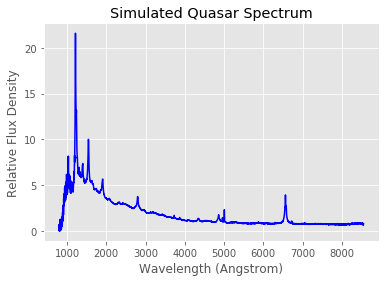

In [4]:
plt.style.use('ggplot')

# Plot of Simulated Quasar Spectrum
plt.plot(wavelength, relative_fluxdensity,
        color = 'b')
plt.title('Simulated Quasar Spectrum')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Relative Flux Density');

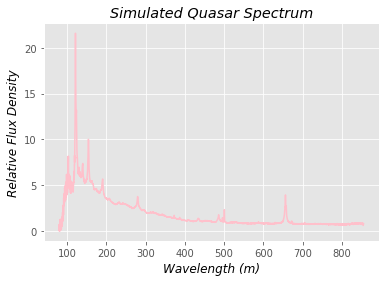

In [5]:
# Plot of Simulated Quasar Spectrum
plt.plot(wavelength_nm, relative_fluxdensity,
        color = 'Pink')
plt.title('Simulated Quasar Spectrum',
         fontstyle = 'italic', 
         color = 'k')
plt.xlabel('Wavelength (m)',
          fontstyle = 'italic',
          color = 'k')
plt.ylabel('Relative Flux Density',
          fontstyle = 'italic',
          color = 'k');

### 1b: Plot a few redshifted quasar spectra

The given spectrum is for a quasar at redshift z=0 (i.e nearby). Plot the portion of the spectrum that is between 400-700nm. Then, calculate the spectrum that would be observed if the quasar was at a redshift of 1.0, 1.5, 2.0, and 2.5. Plot the portion of each spectrum that is between 400-700nm. The reason we're only looking at a small portion of the spectrum is to make the plots more manageable.

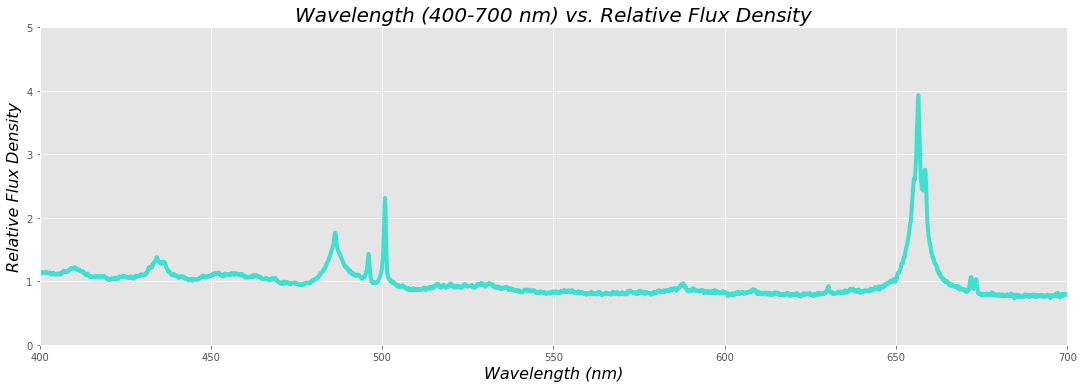

In [6]:
# Plot between 400-700 nm
fig, ax = plt.subplots(1,1)
fig.set_size_inches(15, 5)
fig.tight_layout()

# Set x-limit 400<x<700
ax.set_xlim(400,700)
ax.set_ylim(0, 5)

# Plot spectrum
ax.plot(wavelength_nm, relative_fluxdensity,
       color = 'Turquoise',
       linewidth = 4)
## Part 2: Real instrument bandpasses

# Set labels
ax.set_xlabel('Wavelength (nm)',
             fontstyle = 'italic',
             fontsize = 16,
             color = 'k')

ax.set_ylabel('Relative Flux Density',
             fontstyle = 'italic',
             fontsize = 16,
             color = 'k')

ax.set_title('Wavelength (400-700 nm) vs. Relative Flux Density',
            fontstyle = 'italic',
            fontsize = 20,
            color = 'k');

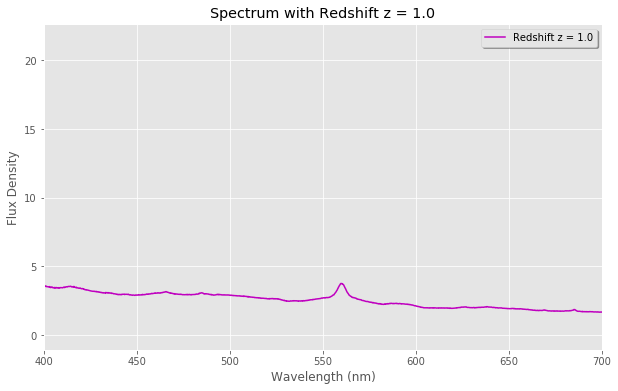

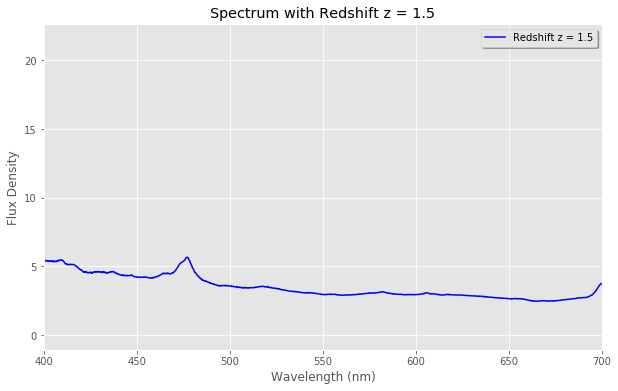

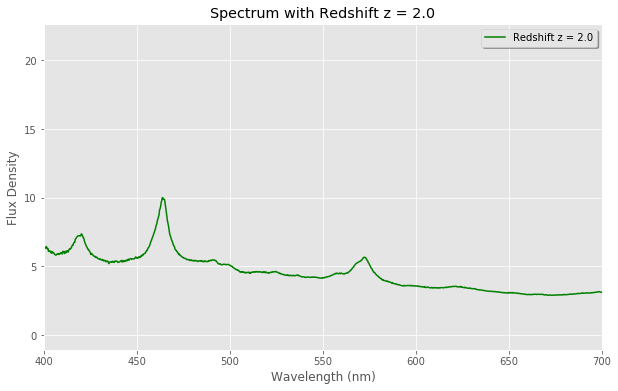

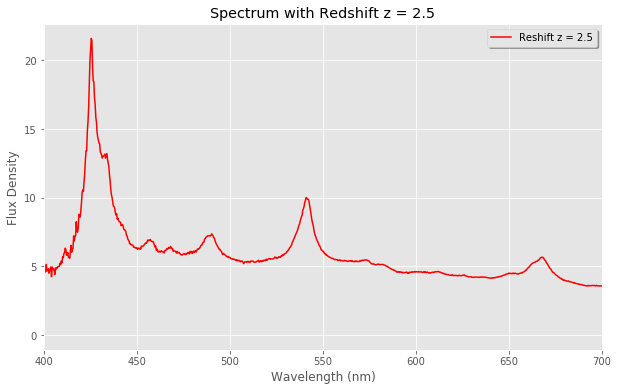

In [7]:
# Portion of spectrum that is between 400-700 nm

def redshift(z, spectrum_wavelength):
    redshiftspectrum = (1 + z) * spectrum_wavelength
    return redshiftspectrum

# Redshift z = 1.0
spectrum_z1 = redshift(1.0, wavelength_nm)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(spectrum_z1, relative_fluxdensity,
        color = 'm',
        label = 'Redshift z = 1.0')
ax.set_title('Spectrum with Redshift z = 1.0')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux Density');

ax.set_xlim(400,700)

ax.legend(loc = 0, shadow = True)

# Redshift z = 1.5
spectrum_z15 = redshift(1.5, wavelength_nm)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(spectrum_z15, relative_fluxdensity,
        color = 'b',
        label = 'Redshift z = 1.5')
ax.set_title('Spectrum with Redshift z = 1.5')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux Density');

ax.set_xlim(400,700)

ax.legend(loc = 0, shadow = True)

# Redshift z = 2.0
spectrum_z2 = redshift(2.0, wavelength_nm)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(spectrum_z2, relative_fluxdensity,
        color = 'g',
        label = 'Redshift z = 2.0')
ax.set_title('Spectrum with Redshift z = 2.0')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux Density');

ax.set_xlim(400,700)

ax.legend(loc = 0, shadow = True)

# Redshift z = 2.5
spectrum_z25 = redshift(2.5, wavelength_nm)

fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(spectrum_z25, relative_fluxdensity,
        color = 'red',
        label = 'Reshift z = 2.5')
ax.set_title('Spectrum with Redshift z = 2.5')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Flux Density');

ax.set_xlim(400,700);

ax.legend(loc = 0, shadow = True);



## Part 2: Real instrument bandpasses

### 2a: Obtain the bandpass

Clone the repository: https://github.com/lsst/throughputs
After cloning, look in the folder called 'baseline' and ignore all of the others.
Read the Readme.md and determine which files you need to use to load the total throughput curves for g- and i-bands. Write down the relevant filepaths (or at least the filenames) in your notebook.

In [8]:
# g-band
gband = pd.read_csv('/Users/audrey/Desktop/throughputs-master/baseline/total_g.dat', delimiter = " ", comment = "#", header=None, skipinitialspace = True)
gband_wavelength = gband[0]
gband_throughput = gband[1]

# i-band
iband = pd.read_csv('/Users/audrey/Desktop/throughputs-master/baseline/total_i.dat', delimiter = " ", comment = "#", header=None, skipinitialspace = True)
iband_wavelength = iband[0]
iband_throughput = iband[1]


### 2b: Plot the bandpasses

Load the data files you determined in 2a, and plot the total throughput curves for LSST g- and i-band. Include units on your axes labels.

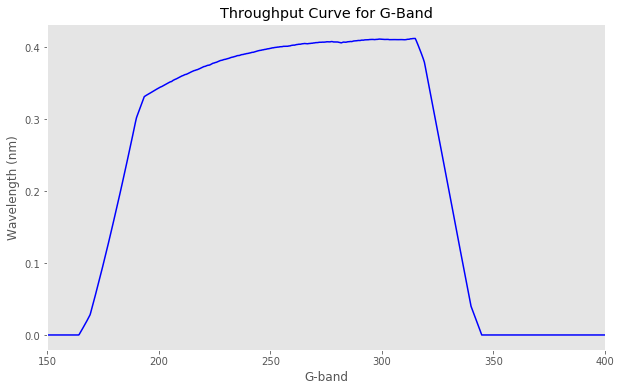

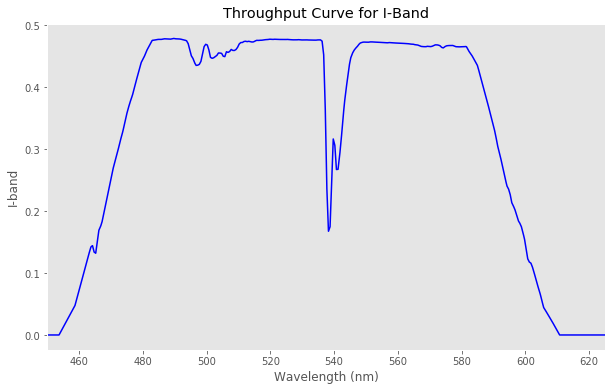

In [9]:
# G-Band
fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(wavelength_nm, gband_throughput[0:7778],
        color = 'b')
ax.set_title('Throughput Curve for G-Band')
ax.set_ylabel('Wavelength (nm)')
ax.set_xlabel('G-band');
ax.set_xlim(150,400)
ax.grid()

#I-Band
fig, ax = plt.subplots(1, 1, figsize = (10,6))
plt.plot(wavelength_nm, iband_throughput[0:7778],
        color = 'b')
ax.set_title('Throughput Curve for I-Band')
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('I-band');
ax.set_xlim(450, 625)
ax.grid()

## Part 3: Observed quasar spectra

### 3a: Plot the observed spectrum

Take your redshifted spectra from 1b and the instrument bandpasses from 2b, and plot the expected observed spectrum for each quasar in each band. Make sure to limit the wavelength ranges of your plots to only those regions with significant values, and make sure that the spectra and the bandpasses are calculated at the same wavelengths. You can either interpolate or find the nearest match to each bin, but make sure your notebook makes it clear what approach you are taking.

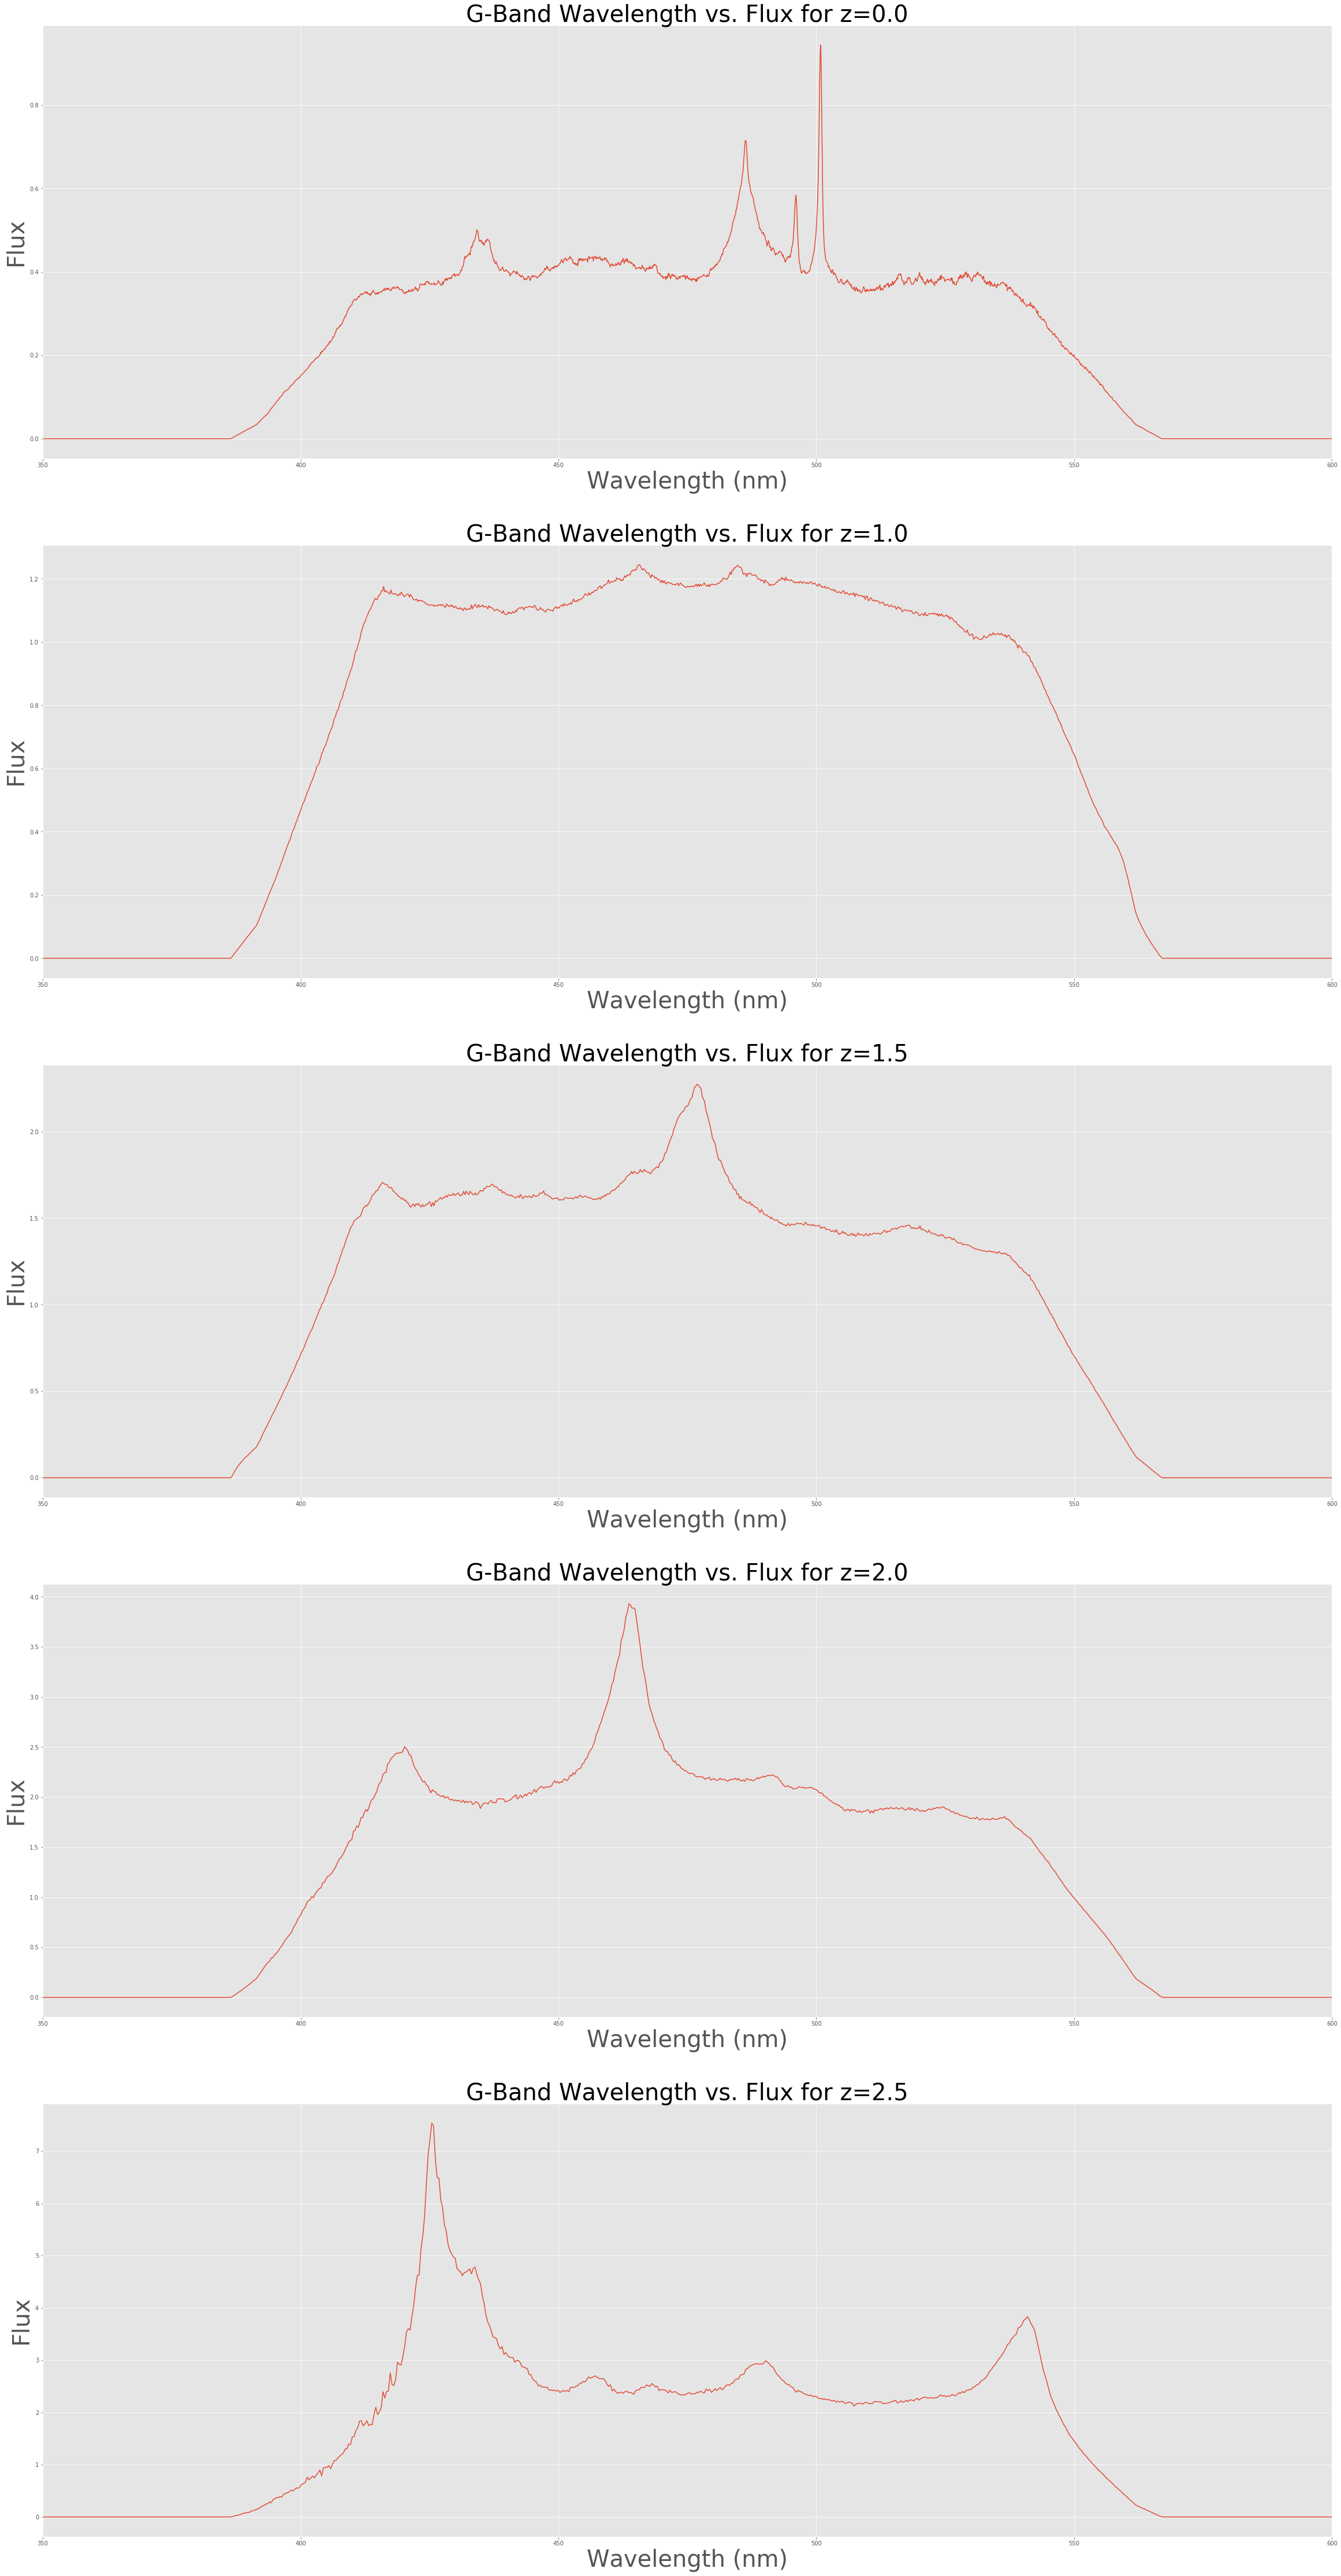

In [10]:
# Plotting for G-Band 

fig, ax = plt.subplots(5,1, figsize = (40,80))

# Redshift of z = 0.0
interpolate = np.interp(wavelength_nm, gband_wavelength[0:7778], gband_throughput[0:7778])
ax[0].plot(wavelength_nm, relative_fluxdensity * interpolate);
ax[0].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[0].set_ylabel('Flux',
                fontsize = 40)
ax[0].set_title('G-Band Wavelength vs. Flux for z=0.0',
               fontsize = 40)

ax[0].set_xlim(350, 600);

# Redshift of z = 1.0
interpolate = np.interp(spectrum_z1, gband_wavelength[0:7778], gband_throughput[0:7778])
ax[1].plot(spectrum_z1, relative_fluxdensity * interpolate);
ax[1].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[1].set_ylabel('Flux',
                fontsize = 40)
ax[1].set_title('G-Band Wavelength vs. Flux for z=1.0',
               fontsize = 40)

ax[1].set_xlim(350, 600);

# Redshift of z = 1.5
interpolate = np.interp(spectrum_z15, gband_wavelength[0:7778], gband_throughput[0:7778])
ax[2].plot(spectrum_z15, relative_fluxdensity * interpolate);
ax[2].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[2].set_ylabel('Flux',
                fontsize = 40)
ax[2].set_title('G-Band Wavelength vs. Flux for z=1.5',
               fontsize = 40)

ax[2].set_xlim(350, 600);

# Redshift of z = 2.0
interpolate = np.interp(spectrum_z2, gband_wavelength[0:7778], gband_throughput[0:7778])
ax[3].plot(spectrum_z2, relative_fluxdensity * interpolate);
ax[3].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[3].set_ylabel('Flux',
                fontsize = 40)
ax[3].set_title('G-Band Wavelength vs. Flux for z=2.0',
               fontsize = 40)

ax[3].set_xlim(350, 600);

# Redshift of z = 2.5
interpolate = np.interp(spectrum_z25, gband_wavelength[0:7778], gband_throughput[0:7778])
ax[4].plot(spectrum_z25, relative_fluxdensity * interpolate);
ax[4].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[4].set_ylabel('Flux',
                fontsize = 40)
ax[4].set_title('G-Band Wavelength vs. Flux for z=2.5',
               fontsize = 40)

ax[4].set_xlim(350, 600);


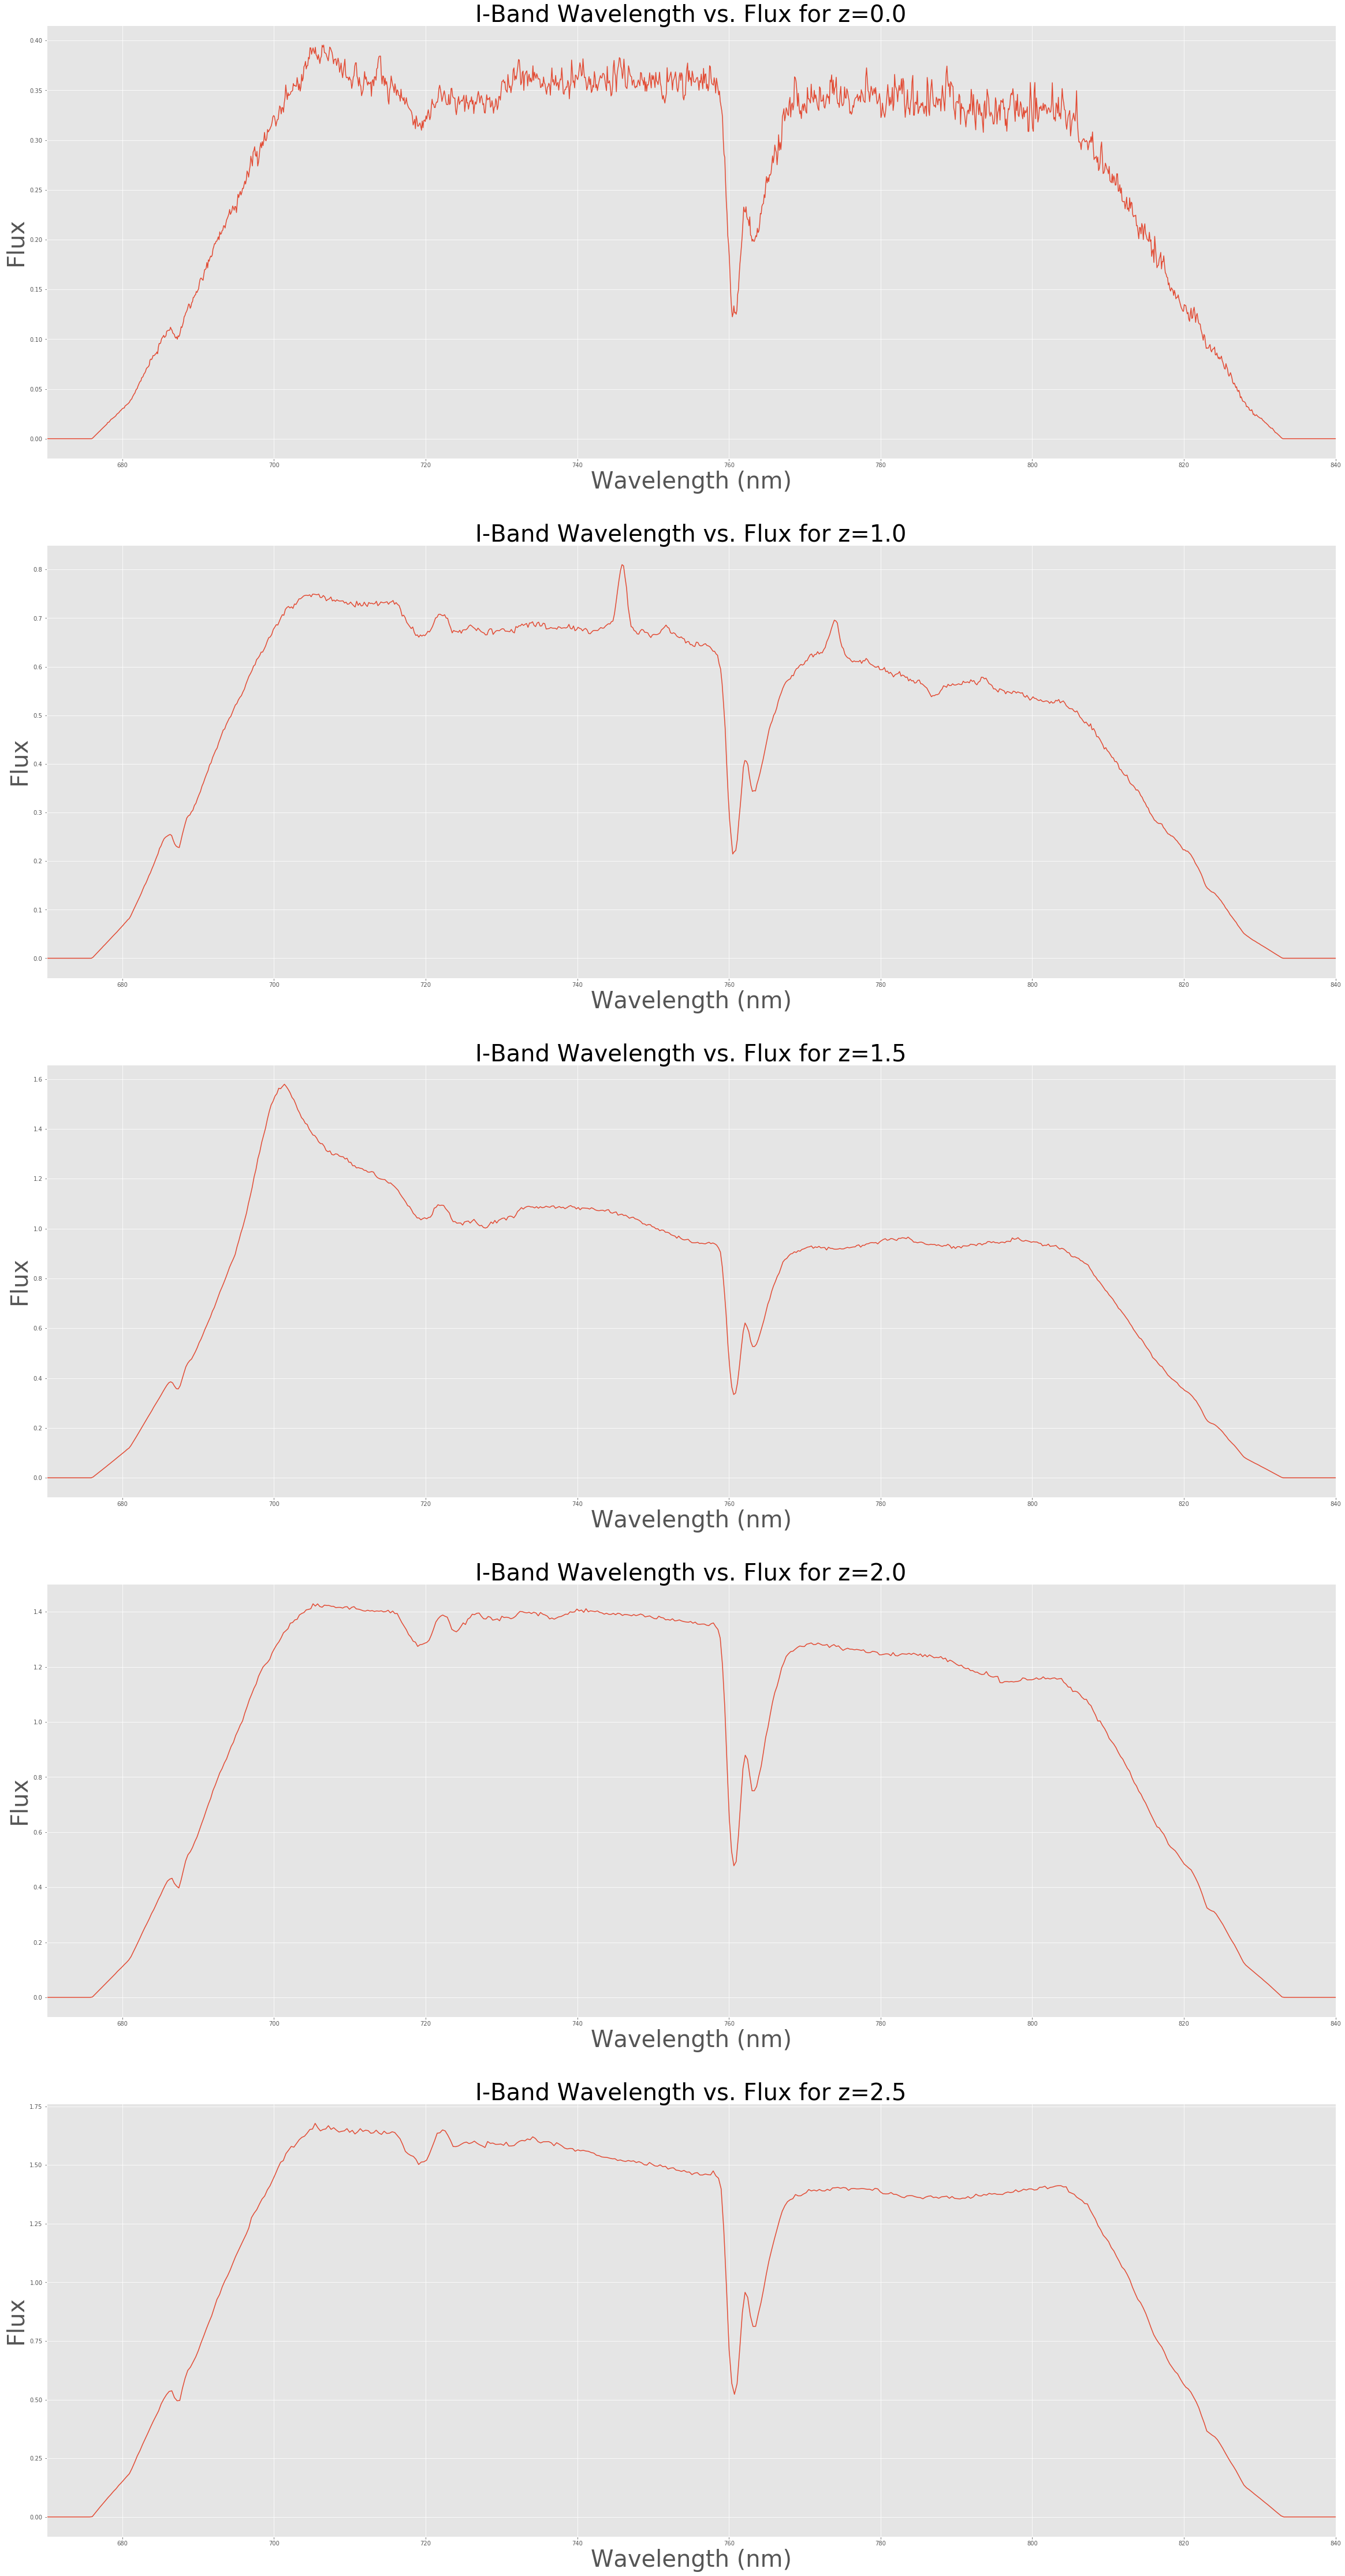

In [11]:
# Plotting for I-Band

fig, ax = plt.subplots(5,1, figsize = (40,80))

# Redshift of z = 0.0
interpolate = np.interp(wavelength_nm, iband_wavelength[0:7778], iband_throughput[0:7778])
ax[0].plot(wavelength_nm, relative_fluxdensity * interpolate);
ax[0].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[0].set_ylabel('Flux',
                fontsize = 40)
ax[0].set_title('I-Band Wavelength vs. Flux for z=0.0',
               fontsize = 40)

ax[0].set_xlim(670, 840);

# Redshift of z = 1.0
interpolate = np.interp(spectrum_z1, iband_wavelength[0:7778], iband_throughput[0:7778])
ax[1].plot(spectrum_z1, relative_fluxdensity * interpolate);
ax[1].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[1].set_ylabel('Flux',
                fontsize = 40)
ax[1].set_title('I-Band Wavelength vs. Flux for z=1.0',
               fontsize = 40)

ax[1].set_xlim(670, 840);

# Redshift of z = 1.5
interpolate = np.interp(spectrum_z15, iband_wavelength[0:7778], iband_throughput[0:7778])
ax[2].plot(spectrum_z15, relative_fluxdensity * interpolate);
ax[2].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[2].set_ylabel('Flux',
                fontsize = 40)
ax[2].set_title('I-Band Wavelength vs. Flux for z=1.5',
               fontsize = 40)

ax[2].set_xlim(670, 840);

# Redshift of z = 2.0
interpolate = np.interp(spectrum_z2, iband_wavelength[0:7778], iband_throughput[0:7778])
ax[3].plot(spectrum_z2, relative_fluxdensity * interpolate);
ax[3].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[3].set_ylabel('Flux',
                fontsize = 40)
ax[3].set_title('I-Band Wavelength vs. Flux for z=2.0',
               fontsize = 40)

ax[3].set_xlim(670, 840);

# Redshift of z = 2.5
interpolate = np.interp(spectrum_z25, iband_wavelength[0:7778], iband_throughput[0:7778])
ax[4].plot(spectrum_z25, relative_fluxdensity * interpolate);
ax[4].set_xlabel('Wavelength (nm)',
                fontsize = 40)
ax[4].set_ylabel('Flux',
                fontsize = 40)
ax[4].set_title('I-Band Wavelength vs. Flux for z=2.5',
               fontsize = 40)

ax[4].set_xlim(670, 840);



### 3b: Expected flux of each quasar

For redshift 0 quasar and each redshifted quasar and each band, calculate the total flux that you would expect to measure. Don't worry about the units or scaling the brightness with distance. In fact, you can define the measured flux of the z=0 quasar to be 1.0 in g-band, and use that normalization to scale all of the other measurements.

In [12]:
# Define function to calculate total flux

def quasarflux(wavelength, flux, band_wavelength, throughput, zshift):
    redshift = wavelength * (1 + zshift)
    interpolate = np.interp(redshift, band_wavelength, throughput)
    observedflux = flux * interpolate
    totalflux = observedflux.sum()
    shift = zshift
    qflux = totalflux * shift
    return qflux

In [13]:
# For G-Band

for z in [0, 1, 1.5, 2.0, 2.5]:
    flux = quasarflux(wavelength_nm, relative_fluxdensity, gband_wavelength, gband_throughput, zshift = z)
    print(f'G-band total flux at redshift z = {z:<4} is {flux:.2f}')
    
    

G-band total flux at redshift z = 0    is 0.00
G-band total flux at redshift z = 1    is 852.20
G-band total flux at redshift z = 1.5  is 1416.73
G-band total flux at redshift z = 2.0  is 2119.53
G-band total flux at redshift z = 2.5  is 2975.55


In [14]:
# For I-Band

for z in [0, 1, 1.5, 2.0, 2.5]:
    flux = quasarflux(wavelength_nm, relative_fluxdensity, iband_wavelength, iband_throughput, zshift = z)
    print(f'I-band total flux at redshift z = {z:<4} is {flux:.2f}')
    

I-band total flux at redshift z = 0    is 0.00
I-band total flux at redshift z = 1    is 400.41
I-band total flux at redshift z = 1.5  is 784.75
I-band total flux at redshift z = 2.0  is 1084.92
I-band total flux at redshift z = 2.5  is 1331.26
